In [3]:
# Import libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# 1. Load CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Test data shape:", x_test.shape)      # (10000, 32, 32, 3)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
# 2. Preprocessing

# Normalize pixel values to [0,1]

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [6]:
# Flatten labels (because they are (n,1))
# y_train = y_train.flatten()
# y_test = y_test.flatten()

In [7]:
# One-hot encode labels (10 classes)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# 3. Define Feedforward NN

model = Sequential([
    # Flatten image into 3072 vector
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
     # 10 output classes
    Dense(10, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 4. Compile Model

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [10]:
# 5. Train Model

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=20,
                    batch_size=128)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.1744 - loss: 2.1995 - val_accuracy: 0.3283 - val_loss: 1.8959
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.2708 - loss: 1.9775 - val_accuracy: 0.3366 - val_loss: 1.8433
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.2950 - loss: 1.9234 - val_accuracy: 0.3531 - val_loss: 1.8143
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3088 - loss: 1.8966 - val_accuracy: 0.3696 - val_loss: 1.7880
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3206 - loss: 1.8551 - val_accuracy: 0.3880 - val_loss: 1.7516
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.3281 - loss: 1.8413 - val_accuracy: 0.3808 - val_loss: 1.7381
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3358 - loss: 1.8189 - val_accuracy: 0.3953 - val_loss: 1.7056
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.3502 - loss: 1.7898 - 

In [11]:
# 6. Evaluate Model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.4443


In [12]:
# 7. Plot Training History

plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation Accuracy')

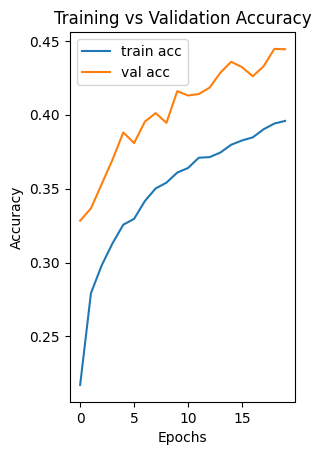

In [13]:
# Accuracy

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")


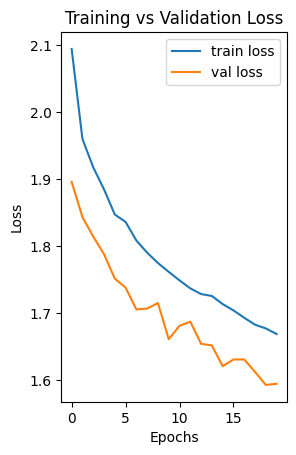

In [15]:
# Loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()